# Signal Network-Enabled Artificial Neural Network Approach for Accurate Water Quality Prediction

### Import Necessary libraries

In [143]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Import the dataset

In [145]:
pd.set_option('display.max_columns',None)

In [146]:
df = pd.read_csv('waterQuality1.csv')

In [147]:
df.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,0.670,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,0.007,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,0.005,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,0.002,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,0.830,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1



### Check info

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

### View countplot of the target column

<Axes: xlabel='count', ylabel='is_safe'>

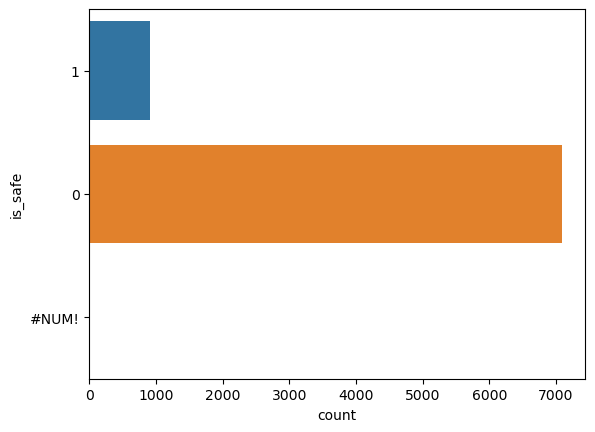

In [149]:
sns.countplot(y = df['is_safe'])

### Check unique values in 'is_safe' column

In [150]:
df['is_safe'].unique()

array(['1', '0', '#NUM!'], dtype=object)

### Remove entries with 'is_safe' value '#NUM!'

In [151]:
rows_to_remove = list(df[df['is_safe'] == '#NUM!'].index)

In [152]:
rows_to_remove

[7551, 7568, 7890]

In [153]:
df.drop(rows_to_remove, inplace = True)

### Change the datatype of 'is_safe' & 'ammonia' column

In [154]:
df['is_safe'] = df['is_safe'].astype('int64')

In [155]:
df['ammonia'] = df['ammonia'].astype('float64')


### Plot correlation matrix on a heatmap

<Axes: >

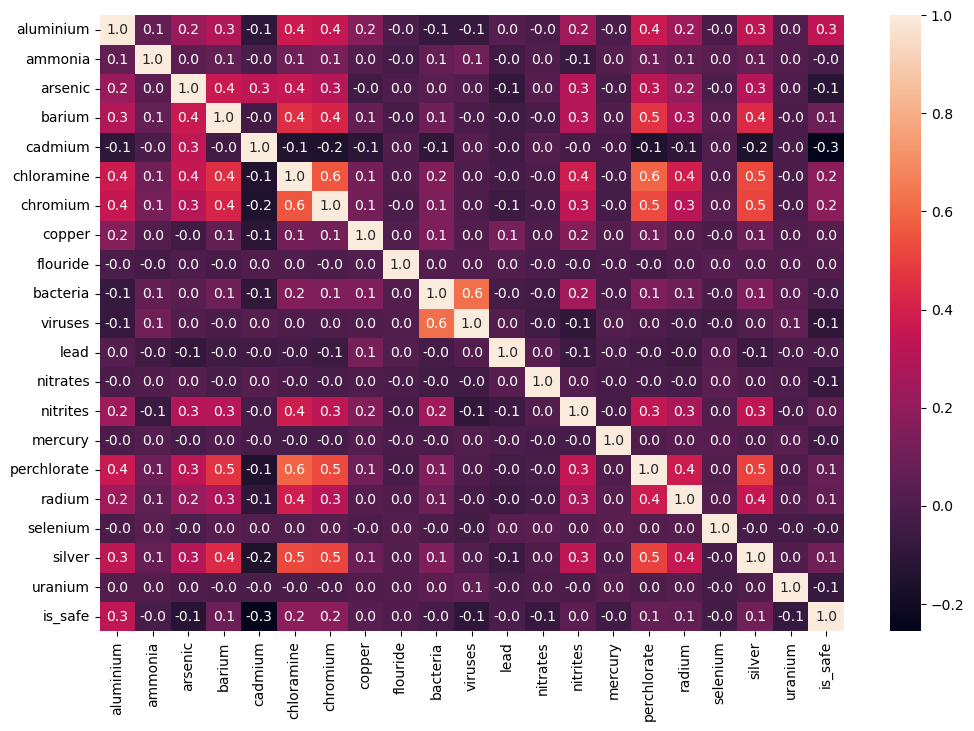

In [156]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')

### Split the dataset into Input & Target Variables

In [157]:
X = df.drop(columns = ['is_safe'])
y = df['is_safe']

### Oversampling with SMOTE to correct the imbalance in the dataset

In [158]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

<Axes: xlabel='count', ylabel='is_safe'>

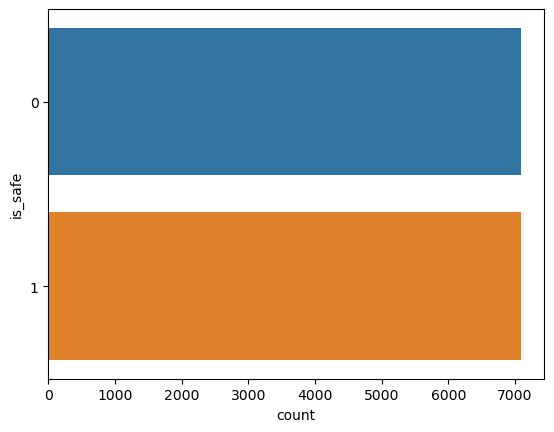

In [159]:
sns.countplot(y = y)

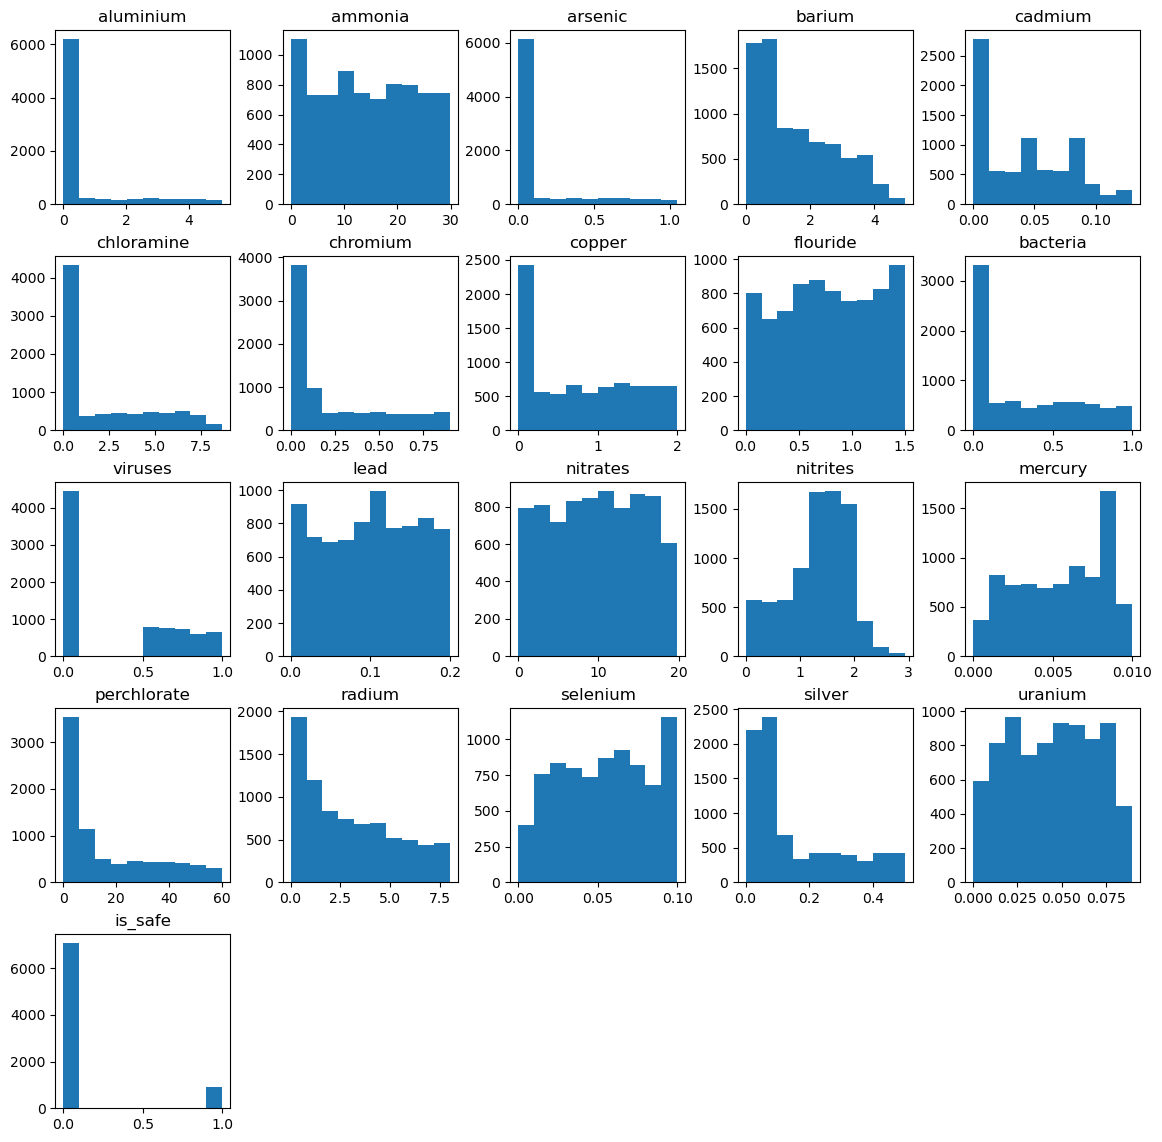

In [160]:
df.hist(figsize=(14,14),grid=False)
plt.show()

### Feature scale our input variables with StandardScaler

In [161]:
scaler = StandardScaler()

In [162]:
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [163]:
X.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object')

In [164]:
import joblib

In [165]:
joblib.dump(scaler, 'scaler')

['scaler']

### Split the dataset into Training & Testing set

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

### Create keras Sequential model

In [167]:
model = Sequential([
    layers.Dense(128, activation = 'relu', input_shape = (X.shape[1],)),
    layers.Dropout(0.2),
    
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [168]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Train the model

In [169]:
model.fit(X_train,y_train, epochs = 100, validation_split = 0.05)

Epoch 1/100
337/337 [==============================] - 3s 4ms/step - loss: 0.3703 - accuracy: 0.8357 - val_loss: 0.2339 - val_accuracy: 0.8977
Epoch 2/100
337/337 [==============================] - 1s 3ms/step - loss: 0.2449 - accuracy: 0.8993 - val_loss: 0.1736 - val_accuracy: 0.9400
Epoch 3/100
337/337 [==============================] - 1s 3ms/step - loss: 0.1987 - accuracy: 0.9188 - val_loss: 0.1612 - val_accuracy: 0.9400
Epoch 4/100
337/337 [==============================] - 1s 3ms/step - loss: 0.1786 - accuracy: 0.9281 - val_loss: 0.1409 - val_accuracy: 0.9436
Epoch 5/100
337/337 [==============================] - 1s 3ms/step - loss: 0.1572 - accuracy: 0.9358 - val_loss: 0.1227 - val_accuracy: 0.9506
Epoch 6/100
337/337 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.9434 - val_loss: 0.1257 - val_accuracy: 0.9506
Epoch 7/100
337/337 [==============================] - 1s 3ms/step - loss: 0.1361 - accuracy: 0.9464 - val_loss: 0.1038 - val_accuracy: 0.9577

Epoch 58/100
337/337 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9888 - val_loss: 0.1106 - val_accuracy: 0.9718
Epoch 59/100
337/337 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0908 - val_accuracy: 0.9718
Epoch 60/100
337/337 [==============================] - 1s 2ms/step - loss: 0.0329 - accuracy: 0.9876 - val_loss: 0.0830 - val_accuracy: 0.9806
Epoch 61/100
337/337 [==============================] - 1s 2ms/step - loss: 0.0311 - accuracy: 0.9886 - val_loss: 0.0753 - val_accuracy: 0.9788
Epoch 62/100
337/337 [==============================] - 1s 2ms/step - loss: 0.0331 - accuracy: 0.9882 - val_loss: 0.0921 - val_accuracy: 0.9735
Epoch 63/100
337/337 [==============================] - 0s 1ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.0957 - val_accuracy: 0.9735
Epoch 64/100
337/337 [==============================] - 1s 2ms/step - loss: 0.0348 - accuracy: 0.9876 - val_loss: 0.0821 - val_accuracy:

In [171]:
from tensorflow.keras.models import load_model

In [172]:
model.save('water_quality_model.h5')

### Make prediction with X_test

In [173]:
predictions = model.predict(X_test)

89/89 [==============================] - 0s 1ms/step


In [174]:
y_pred = [1 if i > 0.5 else 0 for i in predictions]

### Evaluate the model

In [175]:
pd.DataFrame(scaler.inverse_transform(X_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.760000,15.080000,0.520000,3.310000,0.040000,0.120000,0.540000,0.590000,0.540000,-5.551115e-17,0.000000,0.124000,17.730000,1.510000,0.002000,27.710000,7.030000,0.030000,0.080000,0.000000
1,1.090000,28.840000,0.010000,2.160000,0.001000,1.260000,0.850000,1.590000,1.040000,8.000000e-02,0.007000,0.141000,6.480000,1.430000,0.006000,44.660000,2.670000,0.050000,0.350000,0.080000
2,0.110000,25.280000,0.030000,1.030000,0.006000,5.420000,0.760000,0.150000,1.190000,9.000000e-02,0.005000,0.032000,15.360000,1.240000,0.005000,30.220000,5.570000,0.090000,0.020000,0.060000
3,0.090000,23.970000,0.030000,0.620000,0.080000,0.010000,0.080000,0.060000,0.010000,-5.551115e-17,0.000000,0.006000,1.550000,1.360000,0.010000,0.320000,6.590000,0.040000,0.080000,0.080000
4,0.978541,0.425445,0.033517,0.230344,0.019800,0.284893,0.030552,0.307307,0.898072,2.251009e-01,0.227046,0.114876,5.155575,0.998689,0.009352,0.355931,1.043577,0.055931,0.060000,0.067034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,1.213710,9.164538,0.030000,2.248024,0.001880,6.375376,0.786402,0.487083,1.202917,3.226917e-02,0.001760,0.112867,14.550017,1.776920,0.003173,20.172855,3.420095,0.056532,0.127066,0.031199
2830,0.354739,22.047483,0.069174,2.406628,0.018219,2.628186,0.410667,0.409925,0.699740,2.023695e-01,0.131606,0.156708,16.797999,1.668370,0.006000,4.728850,1.092478,0.022741,0.128370,0.017259
2831,0.330000,9.770000,0.480000,3.660000,0.080000,3.790000,0.620000,1.150000,1.490000,1.100000e-01,0.001000,0.087000,16.690000,1.950000,0.006000,2.560000,4.270000,0.100000,0.450000,0.070000
2832,0.090000,25.180000,0.010000,0.390000,0.070000,0.080000,0.100000,1.670000,1.190000,8.600000e-01,0.860000,0.132000,1.200000,1.260000,0.009000,5.730000,2.220000,0.090000,0.090000,0.030000


In [176]:
y_pred

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,


In [177]:
accuracy_score(y_test,y_pred)

0.9805928016937191

<Axes: >

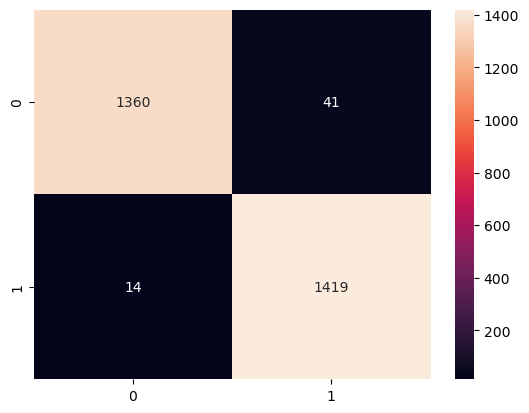

In [178]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [179]:
confusion_matrix(y_test,y_pred)

array([[1360,   41],
       [  14, 1419]], dtype=int64)

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1401
           1       0.97      0.99      0.98      1433

    accuracy                           0.98      2834
   macro avg       0.98      0.98      0.98      2834
weighted avg       0.98      0.98      0.98      2834



In [181]:
def predict_water_quality():
    
    aluminium = float(aluminium_entry.get())
    ammonia = float(ammonia_entry.get())
    arsenic = float(arsenic_entry.get())
    barium = float(barium_entry.get())
    cadmium = float(cadmium_entry.get())
    chloramine = float(chloramine_entry.get())
    chromium = float(chromium_entry.get())
    copper = float(copper_entry.get())
    flouride = float(flouride_entry.get())
    bacteria = float(bacteria_entry.get())
    viruses = float(viruses_entry.get())
    lead = float(lead_entry.get())
    nitrates = float(nitrates_entry.get())
    nitrites = float(nitrites_entry.get())
    mercury  = float(mercury_entry.get())
    perchlorate = float(perchlorate_entry.get())
    radium = float(radium_entry.get())
    selenium = float(selenium_entry.get())
    silver  = float(silver_entry.get())
    uranium = float(uranium_entry.get())
    
    data = [[aluminium, ammonia, arsenic, barium, cadmium, chloramine, chromium, copper, flouride, bacteria, 
                                 viruses, lead, nitrates,nitrites, mercury, perchlorate, radium, selenium, silver,uranium]]
    
    data = scaler.transform(data)
    
    prediction = model.predict(data)
    if prediction[0][0] > 0.5:
        prediction = 1
    else:
        prediction = 0
        
    label.config(text = "Predicted Water Quality:")
    if prediction==1:
        resultbox.insert(0,'SAFE')
    elif prediction==0:
        resultbox.insert(0,'UNSAFE')
    

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from keras.models import load_model
from tkinter import messagebox
import joblib

model = load_model('water_quality_model.h5')

    
top=tk.Tk()
top.geometry('7000x7000')
top.title('Water Quality Prediction')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD' , font=('arial' , 10,'bold'))

aluminium_label = tk.Label(top, text = 'ALUMINIUM')
aluminium_label.place(x = 20, y = 20)
aluminium_entry=tk.Entry(top)
aluminium_entry.place(x = 150, y = 20)

ammonia_label = tk.Label(top, text = 'AMMONIA')
ammonia_label.place(x = 20, y = 50)
ammonia_entry=tk.Entry(top)
ammonia_entry.place(x = 150, y = 50)

arsenic_label = tk.Label(top, text = 'ARSENIC :')
arsenic_label.place(x = 20, y = 80)
arsenic_entry=tk.Entry(top)
arsenic_entry.place(x = 150, y = 80)

barium_label = tk.Label(top, text = 'BARIUM :')
barium_label.place(x = 20, y = 110)
barium_entry=tk.Entry(top)
barium_entry.place(x = 150, y = 110)

cadmium_label = tk.Label(top, text = 'CADMIUM :')
cadmium_label.place(x = 20, y = 140)
cadmium_entry=tk.Entry(top)
cadmium_entry.place(x = 150, y = 140)

chloramine_label = tk.Label(top, text = 'CHLORAMINE :')
chloramine_label.place(x = 20, y = 170)
chloramine_entry=tk.Entry(top)
chloramine_entry.place(x = 150, y = 170)

chromium_label = tk.Label(top, text = 'CHROMIUM :')
chromium_label.place(x = 20, y = 200)
chromium_entry=tk.Entry(top)
chromium_entry.place(x = 150, y = 200)

copper_label = tk.Label(top, text = 'COPPER :')
copper_label.place(x = 20, y = 230)
copper_entry=tk.Entry(top)
copper_entry.place(x = 150, y = 230)

flouride_label = tk.Label(top, text = 'FLOURIDE :')
flouride_label.place(x = 20, y = 260)
flouride_entry=tk.Entry(top)
flouride_entry.place(x = 150, y = 260)

bacteria_label = tk.Label(top, text = 'BACTERIA :')
bacteria_label.place(x = 20, y = 290)
bacteria_entry=tk.Entry(top)
bacteria_entry.place(x = 150, y = 290)

viruses_label = tk.Label(top, text =  'VIRUSES :')
viruses_label.place(x = 20, y = 320)
viruses_entry=tk.Entry(top)
viruses_entry.place(x = 150, y = 320)

lead_label = tk.Label(top, text = 'LEAD :')
lead_label.place(x = 20, y = 350)
lead_entry=tk.Entry(top)
lead_entry.place(x = 150, y = 350)

nitrates_label = tk.Label(top, text = 'NITRATES :')
nitrates_label.place(x = 20, y = 380)
nitrates_entry=tk.Entry(top)
nitrates_entry.place(x = 150, y = 380)

nitrites_label = tk.Label(top, text = 'NITRITES :')
nitrites_label.place(x = 20, y = 410)
nitrites_entry=tk.Entry(top)
nitrites_entry.place(x = 150, y = 410)

mercury_label = tk.Label(top, text = 'MERCURY :')
mercury_label.place(x = 20, y = 440)
mercury_entry=tk.Entry(top)
mercury_entry.place(x = 150, y = 440)

perchlorate_label = tk.Label(top, text = 'PERCHLORATE :')
perchlorate_label.place(x = 20, y = 470)
perchlorate_entry=tk.Entry(top)
perchlorate_entry.place(x = 150, y = 470)

radium_label = tk.Label(top, text = 'RADIUM :')
radium_label.place(x = 20, y = 500)
radium_entry=tk.Entry(top)
radium_entry.place(x = 150, y = 500)

selenium_label = tk.Label(top, text = 'SELENIUM :')
selenium_label.place(x = 20, y = 530)
selenium_entry=tk.Entry(top)
selenium_entry.place(x = 150, y = 530)

silver_label = tk.Label(top, text = 'SILVER :')
silver_label.place(x = 20, y = 560)
silver_entry=tk.Entry(top)
silver_entry.place(x = 150, y = 560)

uranium_label = tk.Label(top, text = 'URANIUM :')
uranium_label.place(x = 20, y = 590)
uranium_entry=tk.Entry(top)
uranium_entry.place(x = 150, y = 590)

button=Button(top,text='PREDICT',command=predict_water_quality)
button.place(x = 100, y = 620)

label = Label(top, text = "Predicted Water Quality:")
label.place(x = 400, y = 150)
resultbox=Entry(top)
resultbox.place(x = 550, y = 150)

top.mainloop()